In [53]:
%matplotlib inline
import os
import flow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid')
from IPython.display import clear_output
import pandas as pd

In [3]:
# Load your triggered traces and corresponding metadata 
mouse = 'OA27'
trace_type = 'dff'
meta_path = os.path.join(flow.paths.outd, mouse + '_df_klg_' + trace_type + '_trialmeta.pkl')
trig_path = os.path.join(flow.paths.outd, mouse + '_df_klg_' + trace_type + '_1.pkl')
df_m = pd.read_pickle(meta_path)
df_t = pd.read_pickle(trig_path)

In [13]:
# merge your dataframes on trial_idx
# print(df_m.head())
df_t = df_t.reset_index(level=['cell_idx', 'timestamp'])

In [14]:
# merge your dataframes on trial_idx
df = pd.merge(df_t, df_m, on=['mouse', 'date', 'run', 'trial_idx'], how='inner')

In [11]:
df_m.head()

condition  hunger  orientation run_type  \
mouse date   run trial_idx                                                  
OA27  170116 2   0          orientation_225  hungry          225    naive   
                 1          orientation_135  hungry          135    naive   
                 2           orientation_90  hungry           90    naive   
                 3          orientation_135  hungry          135    naive   
                 4          orientation_315  hungry          315    naive   

                                            tag  trialerror  
mouse date   run trial_idx                                   
OA27  170116 2   0          orientation_mapping           1  
                 1          orientation_mapping           1  
                 2          orientation_mapping           1  
                 3          orientation_mapping           1  
                 4          orientation_mapping           1

In [12]:
df_t.head()

trace
mouse date   run trial_idx cell_idx timestamp          
OA27  170116 2   0         1        -1.000000  0.048026
                                    -0.967742  0.137448
                                    -0.935484  0.108806
                                    -0.903226  0.049443
                                    -0.870968 -0.006132

In [42]:
# filter your merged df to only include the trial types you want to be dealing with
df1 = df.loc[((df.orientation == 0) | (df.orientation == 135)
            | (df.orientation == 270)) & (df.tag == 'standard') & (df.cell_idx == 1),:]

In [43]:
df1.head()

cell_idx  timestamp     trace condition  hunger  \
mouse date   run trial_idx                                                    
OA27  170116 3   0                 1  -1.000000  0.414747      plus  hungry   
                 0                 1  -0.967742  0.416422      plus  hungry   
                 0                 1  -0.935484  0.405079      plus  hungry   
                 0                 1  -0.903226  0.372945      plus  hungry   
                 0                 1  -0.870968  0.410123      plus  hungry   

                            orientation run_type       tag  trialerror  
mouse date   run trial_idx                                              
OA27  170116 3   0                    0    naive  standard           1  
                 0                    0    naive  standard           1  
                 0                    0    naive  standard           1  
                 0                    0    naive  standard           1  
                 0                    0    naive  standard           1

In [44]:
df1 = df1.loc[np.isfinite(df1.trace),:]
print(np.sum(np.isnan(df1['trace'])))

0


TypeError: 'instancemethod' object has no attribute '__getitem__'

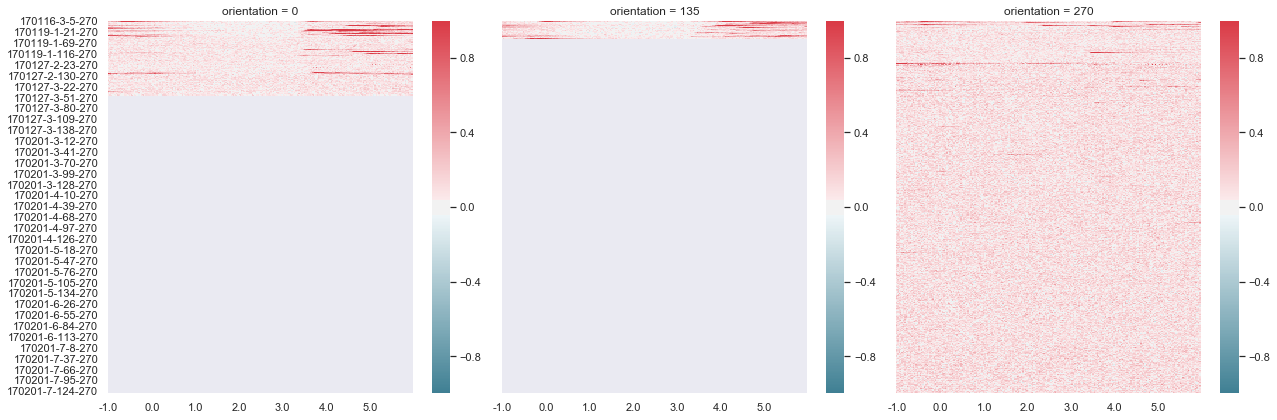

In [174]:
# df1 = df1.set_index(['date', 'timestamp'])
cmap = sns.diverging_palette(220, 10, as_cmap=True)
toplot = df1.pivot_table(index=['date', 'run','trial_idx','orientation'] , columns='timestamp', values='trace')
g = sns.FacetGrid(toplot.reset_index('orientation'), col='orientation', height=6, sharey=True)
ax = g.map_dataframe(myheatmap, vmax=1, vmin=-1, center=0, xticklabels=31, cmap=cmap)
# ax = sns.heatmap(toplot, xticklabels=31)
z = g.facet_axis[0,0].get_ylabel()

In [137]:
def myheatmap(data, **kwargs):
    
#     print(data.head())
    mydata = data.set_index('orientation', append=True)
    sns.heatmap(mydata, **kwargs)

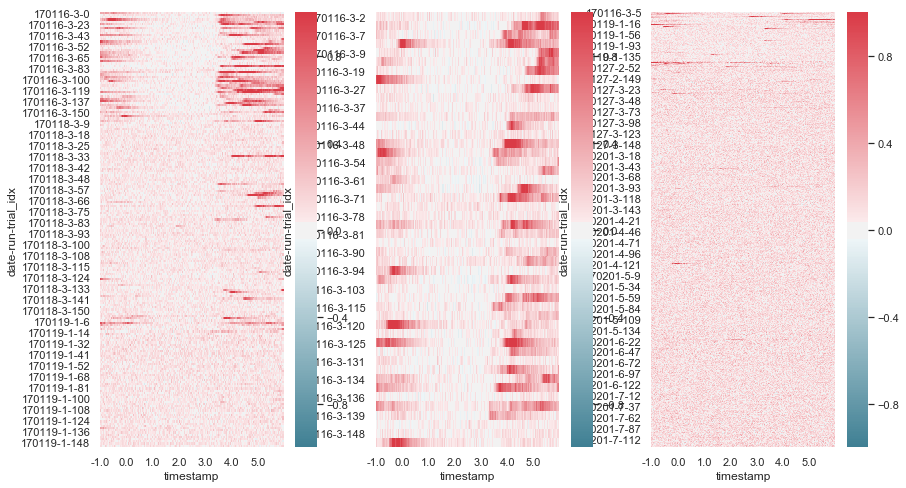

In [136]:
fig, ax = plt.subplots(1,3,figsize=(14,8))

# plotting parameters 
center = 0
vmin = -1
vmax = 1
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# slice datasets into orientations 0, 135, 270
df0 = df1.loc[(df1.orientation == 0),:]
df0 = df0.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')
df135 = df1.loc[(df1.orientation == 135),:]
df135 = df135.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')
df270 = df1.loc[(df1.orientation == 270),:]
df270 = df270.pivot_table(index=['date', 'run','trial_idx'] , columns='timestamp', values='trace')

# to plot with nans there is probably some pandas rehspe of the dataframe that will fill in 
# non overlapping values with nans

# plot heatmaps 
sns.heatmap(df0, xticklabels=31, ax=ax[0], vmax=vmax, vmin=vmin, center=center, cmap=cmap)
sns.heatmap(df135, xticklabels=31, ax=ax[1], vmax=vmax, vmin=vmin, center=center, cmap=cmap)
sns.heatmap(df270, xticklabels=31, ax=ax[2], vmax=vmax, vmin=vmin, center=center, cmap=cmap)